<a href="https://colab.research.google.com/github/UmarIgan/Jupyter-Notebooks/blob/master/Bubble_Dedection_for_the_Crypto_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dedecting Bubbles In Crypto
In today worlds we all became an inverstor and we try to learn protect our money's value. At this time some market has what we call bubble by
other various investor to manipulate markets. As we know, we can track multiple behaivor of markets to understand how price can be move in the
future but understand market manipulation by other investors is a hard topic to handle for regular investors like us. The mathematic is full of
magic and some great minds make this kind of market mainpulation more visible with the power of math.

I am going to cover a great way to track this kind of behaviour here with a python module called lppls aka Log **Periodic Power Law Singularity**.

###some main outputs of lppls:
- Expected Log Price Colon : expected log price at the date of the termination of the bubble
- Critical Time Colon ('tc'): critical time (date of termination of the bubble and transition in a new regime)
- A Colon(a) : log price at the peak when the end of the bubble is reached at Critical Time
- B Colon : amplitude of the power law acceleration
- C Colon : amplitude of the log-periodic oscillations
- m Colon : degree of the super exponential growth
- omega Colon : scaling ratio of the temporal hierarchy of oscillations
phi Colon : time scale of the oscillations

Let's start

Let's first install required modules

In [16]:
!pip install pandas numpy lppls requests ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.24 s (started: 2022-07-27 17:20:08 +00:00)


And import them

In [17]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import requests
import json
import warnings
import datetime as dt
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#pd.options.mode.chained_assignment = None
#pd.set_option('display.max_columns', None)
#pd.options.mode.chained_assignment = None
%load_ext autotime 
%matplotlib inline

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10 ms (started: 2022-07-27 17:20:12 +00:00)


I am am going to mine hourly data of 8 populer crypto from binance which is populer, free and has fast response time 

In [18]:



cryptos=[{'name': 'Bitcoin', 'symbol': 'BTCUSDT', 'usym': '₿', 'gecko': 'bitcoin'},
         {'name': 'Ethereum', 'symbol': 'ETHUSDT', 'usym': 'Ξ', 'gecko': 'ethereum'},
         {'name': 'Cardano', 'symbol': 'ADAUSDT', 'usym': '₳', 'gecko': 'cardano'},
         {'name': 'XRP', 'symbol': 'XRPUSDT', 'usym': '✕', 'gecko': 'ripple'},
         {'name': 'Solana', 'symbol': 'SOLUSDT', 'usym': '◎', 'gecko': 'solana'},
         {'name': 'Polkadot', 'symbol': 'DOTUSDT', 'usym': '●', 'gecko': 'polkadot'},
         {'name': 'Dogecoin', 'symbol': 'DOGEUSDT', 'usym': 'Ð', 'gecko': 'dogecoin'},
         {'name': 'Litecoin', 'symbol': 'LTCUSDT', 'usym': 'Ł', 'gecko': 'litecoin'},
        {'name': 'Litecoin', 'symbol': 'LTCUSDT', 'usym': 'Ł', 'gecko': 'litecoin'},
         ]


symbols= [i['symbol'] for i in cryptos]

#main function to get data as ohlc
def get_bars (symbol, interval='1d'):
    root_url = 'https://api.binance.com/api/v1/klines'
    url = root_url + '?symbol=' + symbol + '&interval=' + interval
    data = json.loads (requests.get (url).text)
    df = pd.DataFrame (data)
    df.columns = ['open_time',
                  'open', 'high', 'low', 'close', 'volume',
                  'close_time', 'qav', 'num_trades',
                  'buyer_seller_volume', 'taker_quote_vol', 'ignore']
    df.index = [dt.datetime.fromtimestamp (x / 1000.0) for x in df.open_time]
    df['close'] = pd.to_numeric (df['close'])
    df['open'] = pd.to_numeric (df['open'])
    df['high'] = pd.to_numeric (df['high'])
    df['low'] = pd.to_numeric (df['low'])
    df['volume'] = pd.to_numeric (df['volume'])
    df['close'] = pd.to_numeric (df['close'])
    df['buyer_seller_volume'] = pd.to_numeric (df['buyer_seller_volume'])
    df['num_trades'] = pd.to_numeric (df['num_trades'])
    df['symbol'] = symbol
    #df_.loc[:, 'name'] = symbol
    return df
#this function will transform data to close values of each hour for each crypto
def return_close_values():
    listi = []
    for i in symbols:
        data = get_bars (i, interval='1h')
        listi.append (data)
    dfi = pd.concat ([pd.DataFrame (x) for x in listi]).apply (pd.Series)
    lis = dfi[['close', 'symbol']].reset_index()
    data2 = lis.pivot_table(index='index', columns='symbol', values='close').reset_index ().rename_axis (None,axis=1).set_index ('index').dropna ()
    data2.index = pd.to_datetime (data2.index)
    return data2
data = return_close_values()#data
data.sample(5)

,ADAUSDT,BTCUSDT,DOGEUSDT,DOTUSDT,ETHUSDT,LTCUSDT,SOLUSDT,XRPUSDT
index,,,,,,,,
2022-07-21 23:00:00,0.4993,23152.19,0.06998,7.53,1575.45,58.02,43.11,0.3669
2022-07-20 02:00:00,0.5235,23370.43,0.06912,7.83,1546.27,58.09,45.07,0.3730
2022-07-07 11:00:00,0.4656,20507.83,0.06938,7.03,1186.07,50.18,37.26,0.3292
2022-07-27 05:00:00,0.4691,21247.25,0.06285,6.79,1452.67,53.80,37.02,0.3365
2022-07-13 20:00:00,0.4206,19670.02,0.06019,6.28,1076.64,48.38,33.57,0.3180


time: 1.92 s (started: 2022-07-27 17:20:12 +00:00)


As you can see, we mined the data. 
Now below, I copy some codes from example in [lppls](https://github.com/Boulder-Investment-Technologies/lppls) github page and functionalized them for fitting above data.

-  ***bubble_finder***:  this function will return lppls results as a dataframe
- ***return_lppls_df***: this function will apply above function to all data and return concaded dataset
- ***plot_pos_confidence_indicators***: this function copied from [lppls](https://github.com/Boulder-Investment-Technologies/lppls) to plot all results separetly to understand results

In [19]:
def bubble_finder(data):
    time_ord = [pd.Timestamp.toordinal(t1) for t1 in data.index]
    # create list of observation data
    price = np.log(data.values)

    # create observations array (expected format for LPPLS observations)
    observations = np.array([time_ord, price])

    # set the max number for searches to perform before giving-up
    MAX_SEARCHES = 25
   
    lppls_model = lppls.LPPLS(observations=observations)

    res = lppls_model.mp_compute_nested_fits(
        max_searches=5, workers=8
        # filter_conditions_config={} # not implemented in 0.6.x
    )
    res_df = lppls_model.compute_indicators(res)
    res_df['ordinal_time'] = res_df['time']
    res_df['symbol'] = data.name
    #res_df['date2'] =data.index
    #res_df['time'] = [pd.Timestamp.fromordinal(int(t1)) for t1 in res_df['time']]
    #res_df.set_index('time', inplace=True)
  
    return res_df


def plot_pos_confidence_indicators(res_df):
    #https://github.com/Boulder-Investment-Technologies/avoiding_bubbles/blob/main/utils/plotting.py
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12, 6))
    ts = res_df.index
    # plot pos bubbles
    ax1_0 = ax1.twinx()
    ax1.plot(ts, res_df['price'], color='black', linewidth=0.75)
    # ax1_0.plot(compatible_date, pos_lst, label='pos bubbles', color='gray', alpha=0.5)
    ax1_0.plot(ts, res_df['pos_conf'], label='bubble indicator (pos)', color='red', alpha=0.5)
    # set grids
    ax1.grid(which='major', axis='both')
    # set labels
    ax1.set_ylabel('ln(p)')
    ax1_0.set_ylabel('bubble indicator (pos)')
    ax1_0.legend(loc=2)
    plt.title('Positive LPPLS Conf Indicator')
    plt.fill_between(ts, res_df['pos_conf'], color='red', alpha=0.5)
    plt.show()

time: 28.8 ms (started: 2022-07-27 17:20:14 +00:00)


100%|██████████| 85/85 [01:44<00:00,  1.23s/it]


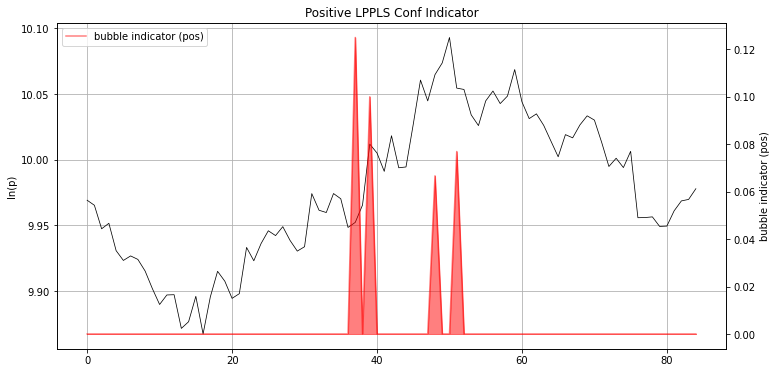

time: 1min 44s (started: 2022-07-27 17:20:14 +00:00)


In [20]:
res_btc = bubble_finder(data['BTCUSDT'])
plot_pos_confidence_indicators(res_btc.reset_index())

In [21]:
res_dog

,time,price,pos_conf,neg_conf,_fits,ordinal_time,symbol
0,1657429200000000000,-2.681360,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1657429200000000000,DOGEUSDT
1,1657447200000000000,-2.688101,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1657447200000000000,DOGEUSDT
2,1657465200000000000,-2.706052,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1657465200000000000,DOGEUSDT
3,1657483200000000000,-2.694443,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1657483200000000000,DOGEUSDT
4,1657501200000000000,-2.717192,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1657501200000000000,DOGEUSDT
...,...,...,...,...,...,...,...
80,1658869200000000000,-2.792791,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1658869200000000000,DOGEUSDT
81,1658887200000000000,-2.776436,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1658887200000000000,DOGEUSDT
82,1658905200000000000,-2.768437,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1658905200000000000,DOGEUSDT
83,1658923200000000000,-2.766209,0,0,"[{'tc': 0, 'm': 0, 'w': 0, 'a': 0, 'b': 0, 'c'...",1658923200000000000,DOGEUSDT


time: 130 ms (started: 2022-07-27 17:21:58 +00:00)


100%|██████████| 85/85 [01:29<00:00,  1.05s/it]


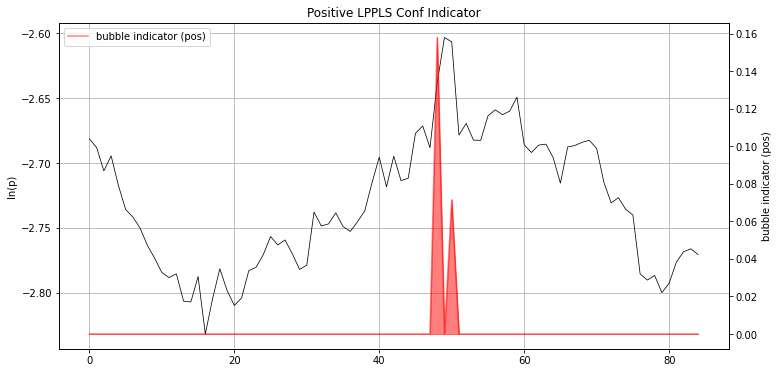

time: 1min 30s (started: 2022-07-27 17:21:59 +00:00)


In [22]:
res_dog = bubble_finder(data['DOGEUSDT'])
plot_pos_confidence_indicators(res_dog.reset_index())